# Holt-Winters' Method
*Triple Exponential Smoothing: based on three smoothing constants: level, trend, and seasonalality*

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [61]:
df = pd.read_excel('DATA FILE 334 (2).xlsx')

In [62]:
start_index_2018 = df.columns.get_loc("Jan (2018)")
end_index_2018 = df.columns.get_loc("Dec (2018)")
start_index_2019 = df.columns.get_loc("Jan (2019)")
end_index_2019 = df.columns.get_loc("Dec (2019)")

In [63]:
train_data = df.iloc[:, start_index_2018:end_index_2018+1].mean(axis=0)
test_data = df.iloc[:, start_index_2019:end_index_2019+1].mean(axis=0)

In [64]:
alpha_values = np.linspace(0.1, 0.9, 9)  
beta_values = np.linspace(0.1, 0.9, 9)  
gamma_values = np.linspace(0.1, 0.9, 9)  

best_alpha, best_beta, best_gamma = None, None, None
best_mse = float("inf")

seasonal_periods = 6  # Assuming monthly data with yearly seasonality; adjust as needed
seasonality_type = 'add'  # 'mul' for multiplicative seasonality

for alpha in alpha_values:
    for beta in beta_values:
        for gamma in gamma_values:
            model = ExponentialSmoothing(train_data, 
                                         trend='add', 
                                         seasonal=seasonality_type, 
                                         seasonal_periods=seasonal_periods,
                                         initialization_method="legacy-heuristic")
            fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, optimized=False)
            
            forecasts = fitted_model.forecast(steps=len(test_data))
            mse = mean_squared_error(test_data, forecasts)
            if mse < best_mse:
                best_mse = mse
                best_alpha = alpha
                best_beta = beta
                best_gamma = gamma

# Print best alpha, beta, gamma, and MSE
print(f'Best alpha: {best_alpha}')
print(f'Best beta: {best_beta}')
print(f'Best gamma: {best_gamma}')
print(f'Best MSE: {best_mse}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported inde

Best alpha: 0.1
Best beta: 0.7000000000000001
Best gamma: 0.4
Best MSE: 114.72195043577766


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmod

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported inde

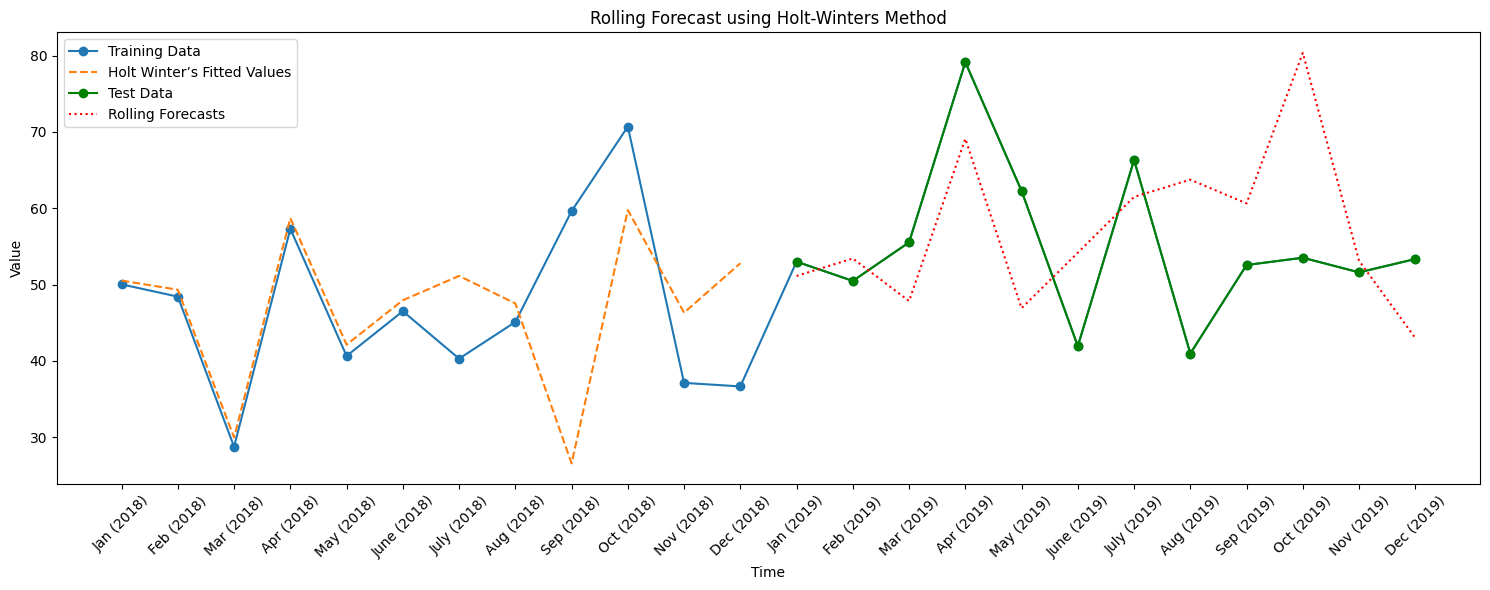

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

alpha = 0.1
beta = 0.7
gamma = 0.4
seasonal_periods = 6
seasonality_type = 'add'  

model = ExponentialSmoothing(train_data,
                             trend='add',
                             seasonal=seasonality_type,
                             seasonal_periods=seasonal_periods,
                             initialization_method="legacy-heuristic")
fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, optimized=False)

# Create an empty series to store rolling forecasts
rolling_forecasts = pd.Series(index=test_data.index)

# Perform rolling forecasting
for period, actual_value in test_data.items():
    # Forecast the next step
    next_forecast = fitted_model.forecast(steps=1).iloc[0]
    rolling_forecasts.at[period] = next_forecast
    
    # Update the training data with the new actual value
    train_data.at[period] = actual_value
    model = ExponentialSmoothing(train_data,
                             trend='add',
                             seasonal=seasonality_type,
                             seasonal_periods=seasonal_periods,
                             initialization_method="legacy-heuristic")
    fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, optimized=False)

plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data, label='Training Data', marker='o')
plt.plot(train_data.index[:-len(test_data)], fitted_model.fittedvalues[:-len(test_data)], label='Holt Winter’s Fitted Values', linestyle='--')
plt.plot(test_data.index, test_data, label='Test Data', marker='o', color='green')
plt.plot(rolling_forecasts.index, rolling_forecasts, label='Rolling Forecasts', color='red', linestyle=':')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Rolling Forecast using Holt-Winters Method')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [75]:
df_repeaters = df[df['Coeff_Code'] == 'Repeater'].set_index('Part ID').drop(columns=['Coeff_Code'])
df_runners = df[df['Coeff_Code'] == 'Runner'].set_index('Part ID').drop(columns=['Coeff_Code'])
df_selected = df[df['Coeff_Code'].isin(['Spiker', 'Stranger'])].set_index('Part ID').drop(columns=['Coeff_Code'])

start_index_2018 = df_repeaters.columns.get_loc("Jan (2018)")
end_index_2018 = df_repeaters.columns.get_loc("Dec (2018)")
start_index_2019 = df_repeaters.columns.get_loc("Jan (2019)")
end_index_2019 = df_repeaters.columns.get_loc("Dec (2019)")

start_index_2018 = df_runners.columns.get_loc("Jan (2018)")
end_index_2018 = df_runners.columns.get_loc("Dec (2018)")
start_index_2019 = df_runners.columns.get_loc("Jan (2019)")
end_index_2019 = df_runners.columns.get_loc("Dec (2019)")

start_index_2018 = df_selected.columns.get_loc("Jan (2018)")
end_index_2018 = df_selected.columns.get_loc("Dec (2018)")
start_index_2019 = df_selected.columns.get_loc("Jan (2019)")
end_index_2019 = df_selected.columns.get_loc("Dec (2019)")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/

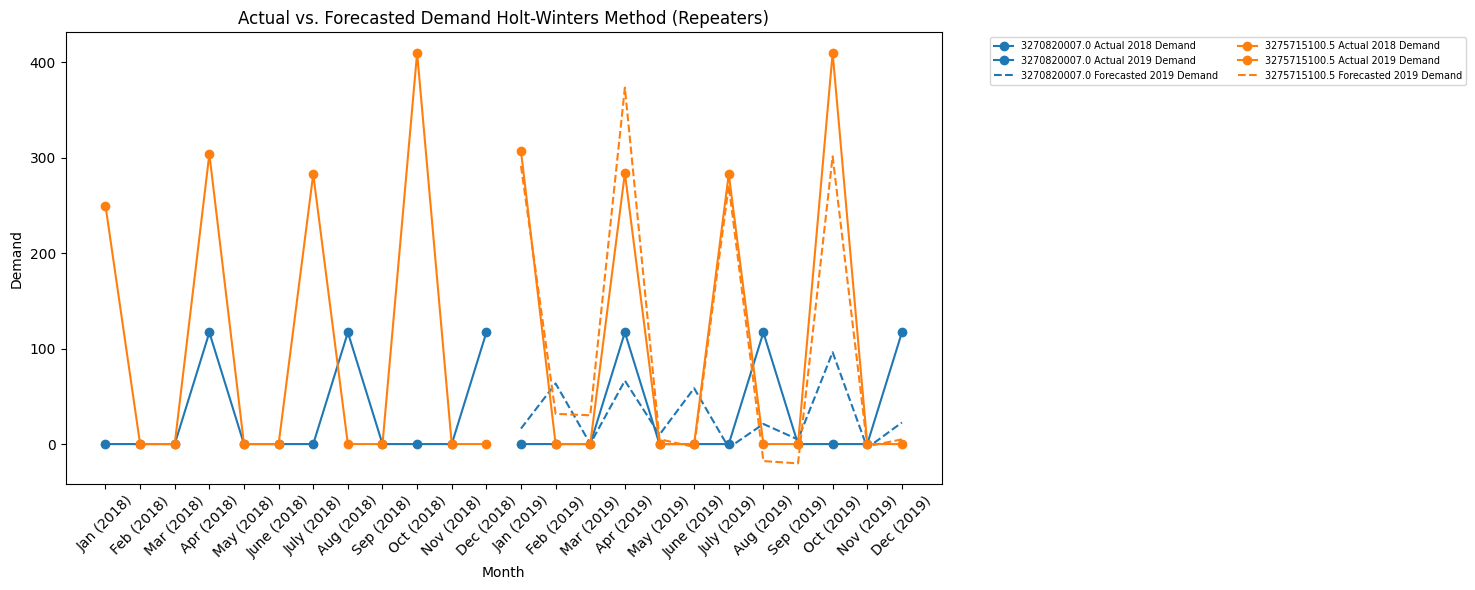

In [74]:


plt.figure(figsize=(15, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 10))


alpha = 0.1
beta = 0.7
gamma = 0.4
seasonal_periods = 6  # Adjust based on your data's seasonality
seasonality_type = 'add'  # or 'mul' for multiplicative seasonality

mad_list = []
mse_list = []
mape_list = []

months_2018 = df_repeaters.columns[start_index_2018:end_index_2018+1]
months_2019 = df_repeaters.columns[start_index_2019:end_index_2019+1]

num_products_processed = 0

for product_id, row in df_repeaters.iterrows():
    if product_id in (3275715100.5, 3270820007.0):
        color = colors[num_products_processed % len(colors)]
        
        numeric_data = pd.to_numeric(row, errors='coerce').fillna(0)
        train_data = numeric_data.iloc[start_index_2018:end_index_2018+1].copy()
        test_data = numeric_data.iloc[start_index_2019:end_index_2019+1]
        
        if not train_data.empty:
            model = ExponentialSmoothing(train_data, trend='add', seasonal=seasonality_type, seasonal_periods=seasonal_periods, initialization_method="legacy-heuristic")
            fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, optimized=False)
            
            full_data = pd.concat([train_data, test_data])
            forecasts = []
            errors = []

            for i in range(len(test_data)):
                updated_train_data = full_data.iloc[:len(train_data)+i]
                model = ExponentialSmoothing(updated_train_data, trend='add', seasonal=seasonality_type, seasonal_periods=seasonal_periods, initialization_method="legacy-heuristic")
                fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, optimized=False)
                
                next_forecast = fitted_model.forecast(steps=1).iloc[0]
                forecasts.append(next_forecast)

            plt.plot(months_2018, train_data, marker='o', color=color, label=f'{product_id} Actual 2018 Demand')
            plt.plot(months_2019, test_data, marker='o', color=color, label=f'{product_id} Actual 2019 Demand')
            plt.plot(months_2019, forecasts, linestyle='--', color=color, label=f'{product_id} Forecasted 2019 Demand')
        
        num_products_processed += 1

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Actual vs. Forecasted Demand Holt-Winters Method (Repeaters)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small', ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/

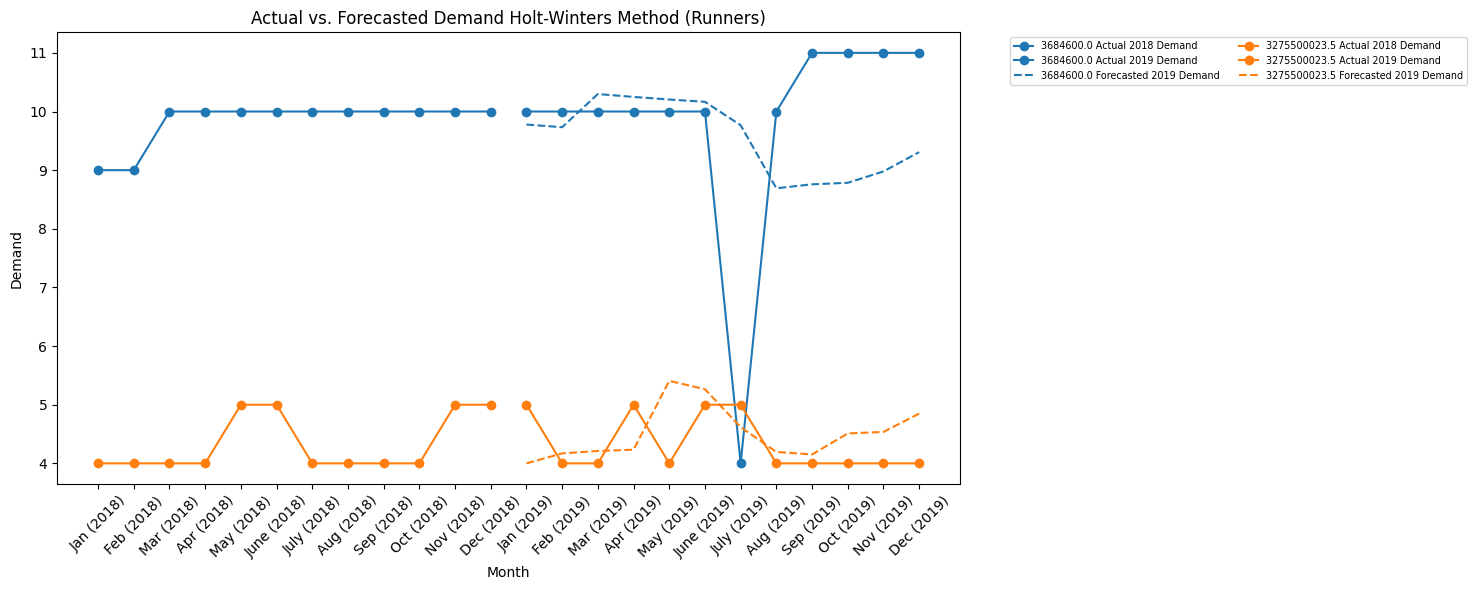

In [76]:


plt.figure(figsize=(15, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 10))


alpha = 0.1
beta = 0.7
gamma = 0.4
seasonal_periods = 6  # Adjust based on your data's seasonality
seasonality_type = 'add'  # or 'mul' for multiplicative seasonality

mad_list = []
mse_list = []
mape_list = []

months_2018 = df_runners.columns[start_index_2018:end_index_2018+1]
months_2019 = df_runners.columns[start_index_2019:end_index_2019+1]

num_products_processed = 0

for product_id, row in df_runners.iterrows():
    if product_id in (3275500023.5, 3684600.0,):
        color = colors[num_products_processed % len(colors)]
        
        numeric_data = pd.to_numeric(row, errors='coerce').fillna(0)
        train_data = numeric_data.iloc[start_index_2018:end_index_2018+1].copy()
        test_data = numeric_data.iloc[start_index_2019:end_index_2019+1]
        
        if not train_data.empty:
            model = ExponentialSmoothing(train_data, trend='add', seasonal=seasonality_type, seasonal_periods=seasonal_periods, initialization_method="legacy-heuristic")
            fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, optimized=False)
            
            full_data = pd.concat([train_data, test_data])
            forecasts = []
            errors = []

            for i in range(len(test_data)):
                updated_train_data = full_data.iloc[:len(train_data)+i]
                model = ExponentialSmoothing(updated_train_data, trend='add', seasonal=seasonality_type, seasonal_periods=seasonal_periods, initialization_method="legacy-heuristic")
                fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, optimized=False)
                
                next_forecast = fitted_model.forecast(steps=1).iloc[0]
                forecasts.append(next_forecast)

            plt.plot(months_2018, train_data, marker='o', color=color, label=f'{product_id} Actual 2018 Demand')
            plt.plot(months_2019, test_data, marker='o', color=color, label=f'{product_id} Actual 2019 Demand')
            plt.plot(months_2019, forecasts, linestyle='--', color=color, label=f'{product_id} Forecasted 2019 Demand')
        
        num_products_processed += 1

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Actual vs. Forecasted Demand Holt-Winters Method (Runners)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small', ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/

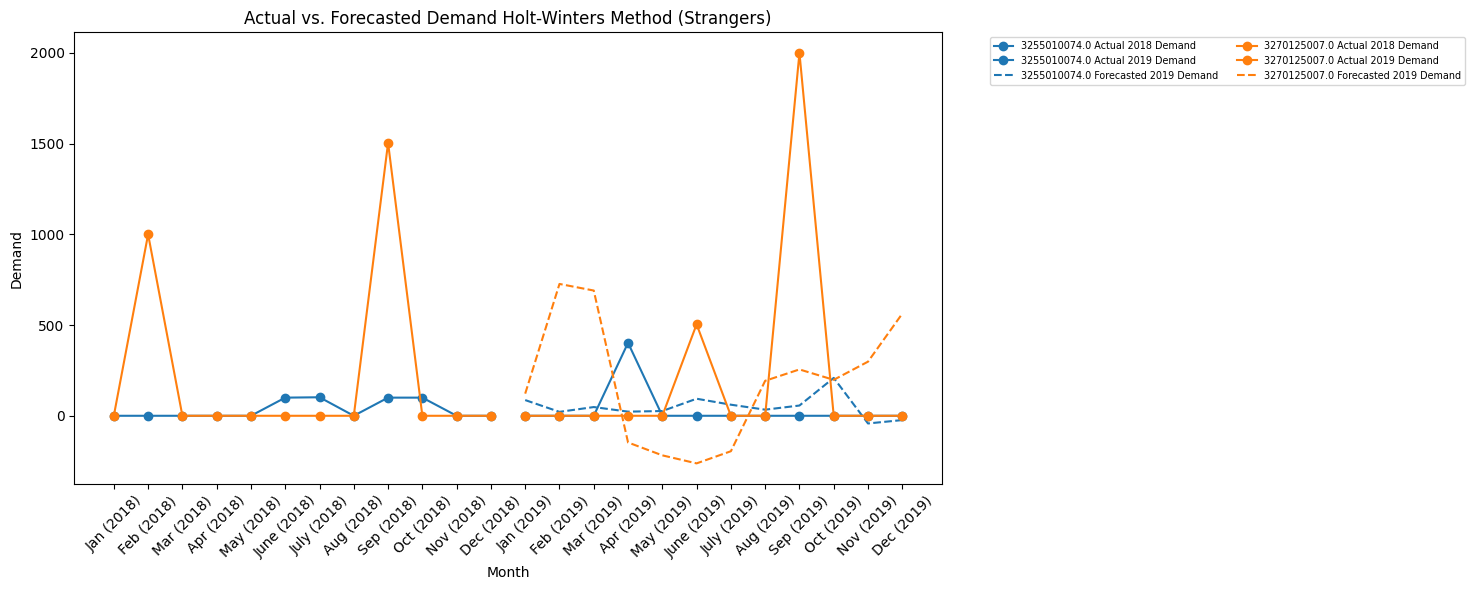

In [78]:
plt.figure(figsize=(15, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 10))


alpha = 0.1
beta = 0.7
gamma = 0.4
seasonal_periods = 6  # Adjust based on your data's seasonality
seasonality_type = 'add'  # or 'mul' for multiplicative seasonality

mad_list = []
mse_list = []
mape_list = []

months_2018 = df_selected.columns[start_index_2018:end_index_2018+1]
months_2019 = df_selected.columns[start_index_2019:end_index_2019+1]

num_products_processed = 0

for product_id, row in df_selected.iterrows():
    if product_id in (3270125007.0, 3255010074.0):
        color = colors[num_products_processed % len(colors)]
        
        numeric_data = pd.to_numeric(row, errors='coerce').fillna(0)
        train_data = numeric_data.iloc[start_index_2018:end_index_2018+1].copy()
        test_data = numeric_data.iloc[start_index_2019:end_index_2019+1]
        
        if not train_data.empty:
            model = ExponentialSmoothing(train_data, trend='add', seasonal=seasonality_type, seasonal_periods=seasonal_periods, initialization_method="legacy-heuristic")
            fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, optimized=False)
            
            full_data = pd.concat([train_data, test_data])
            forecasts = []
            errors = []

            for i in range(len(test_data)):
                updated_train_data = full_data.iloc[:len(train_data)+i]
                model = ExponentialSmoothing(updated_train_data, trend='add', seasonal=seasonality_type, seasonal_periods=seasonal_periods, initialization_method="legacy-heuristic")
                fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, optimized=False)
                
                next_forecast = fitted_model.forecast(steps=1).iloc[0]
                forecasts.append(next_forecast)

            plt.plot(months_2018, train_data, marker='o', color=color, label=f'{product_id} Actual 2018 Demand')
            plt.plot(months_2019, test_data, marker='o', color=color, label=f'{product_id} Actual 2019 Demand')
            plt.plot(months_2019, forecasts, linestyle='--', color=color, label=f'{product_id} Forecasted 2019 Demand')
        
        num_products_processed += 1

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Actual vs. Forecasted Demand Holt-Winters Method (Strangers)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small', ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
